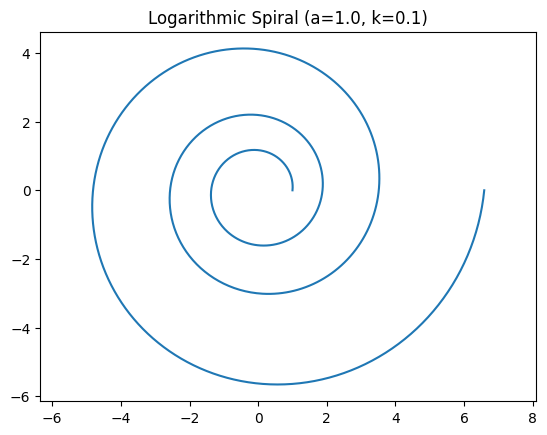

In [7]:
#https://chatgpt.com/s/t_689241c6c76881918ee7c67f76416ecd
import numpy as np
import matplotlib.pyplot as plt

a, k = 1.0, 0.1
θ = np.linspace(0, 6*np.pi, 1000)
r = a * np.exp(k * θ)
x = r * np.cos(θ)
y = r * np.sin(θ)

plt.plot(x, y)
plt.axis('equal')
plt.title(f'Logarithmic Spiral (a={a}, k={k})')
plt.show()


In [1]:
def antipode(lat, lon):
#https://chatgpt.com/s/t_6892418b6c388191a13cecdc85702d0a
    """
    Returns the antipodal point (latitude, longitude) for given latitude and longitude.
    Inputs/outputs are in decimal degrees.
    """
    lat_a = -lat
    if lon <= 0:
        lon_a = lon + 180
    else:
        lon_a = lon - 180

    # Normalize longitude to range [-180, +180]
    if lon_a > 180:
        lon_a -= 360
    elif lon_a < -180:
        lon_a += 360

    return lat_a, lon_a

# Example usage:
#print(antipode(32.7749, 12.4194))  # ~ San Francisco → antipode somewhere in Indian Ocean
print(antipode(-32.7749, -167.5806)) 


(32.7749, 12.419399999999996)


# check
to verify your antipode is exactly ~20,000 km away (half Earth’s circumference) or plot the great-circle path between points

In [3]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # average Earth radius in km
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)

    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    distance = 2 * R * math.asin(min(1, math.sqrt(a)))
    return distance

# Example check:
lat, lon = 37.7749, -122.4194
lat_a, lon_a = antipode(lat, lon)
print(haversine(lat, lon, lat_a, lon_a))  # should be roughly ~20015 km


20015.086796020572


/home/victor/Documents/projects/stacapi_502/notebooks/ntbks_env/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


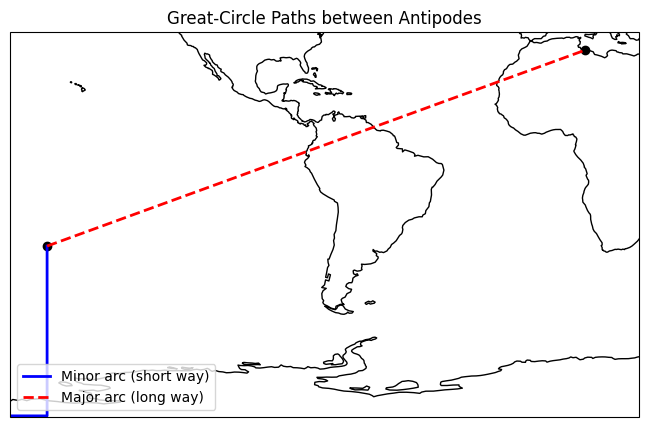

In [ ]:
#https://chatgpt.com/s/t_68924458db388191b05b8453ae07034d
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from geographiclib.geodesic import Geodesic

# Your endpoints
lat1, lon1 = -32.7749, -167.5806
lat2, lon2 = 32.7749, 12.4194

# Use GeographicLib to compute the great circle points (n points)
geod = Geodesic.WGS84
num = 200
gc = geod.InverseLine(lat1, lon1, lat2, lon2)
dist = gc.s13

# Create points along the path
lats_minor, lons_minor = [], []
for i in np.linspace(0, 1, num):
    pos = gc.Position(i * dist, Geodesic.STANDARD | Geodesic.LONG_UNROLL)
    lats_minor.append(pos['lat2'])
    lons_minor.append(pos['lon2'])

# To plot the long (major) arc, insert the antipodes between endpoints, following Chris Havlin's trick:
ant1_lat, ant1_lon = -lat1, lon1 + 180
ant2_lat, ant2_lon = -lat2, lon2 + 180

# Normalize longitudes to [-180, 180]
def norm_lon(lon):
    return (lon + 180) % 360 - 180

ant1_lon = norm_lon(ant1_lon)
ant2_lon = norm_lon(ant2_lon)

lats_major = [lat1, ant2_lat, ant1_lat, lat2]
lons_major = [lon1, ant2_lon, ant1_lon, lon2]

# Plot
proj = ccrs.PlateCarree()
plt.figure(figsize=(10,5))
ax = plt.axes(projection=proj)
ax.coastlines()

ax.plot(lons_minor, lats_minor, color='blue', linewidth=2, label='Minor arc (short way)')
ax.plot(lons_major, lats_major, color='red', linestyle='--', linewidth=2, label='Major arc (long way)')

ax.scatter([lon1, lon2], [lat1, lat2], color='black')
ax.legend(loc='lower left')

plt.title('Great-Circle Paths between Antipodes')
plt.show()
